The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['sgRNA_0', 'gene_symbol_0']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
1263
Performing Kolmogorov-Smirnov test on gene set cosine similarity..
KS statistic: 0.25893635571054924, p-value: 3.415565340551762e-34


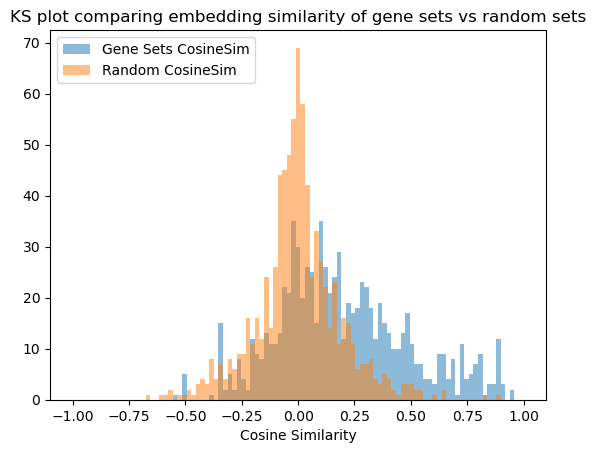

Computing distance matrix for embeddings..
Finished prediction sweep over percentiles.
    percentile    recall  precision  f1_score       TPR       FPR
15          95  0.259459   0.059625  0.096966  0.259459  0.095548
    percentile    recall  precision  f1_score       TPR       FPR
10          90  0.366201   0.041911  0.075213  0.366201  0.195471
vae_64_lg5jiwy7_v4_all


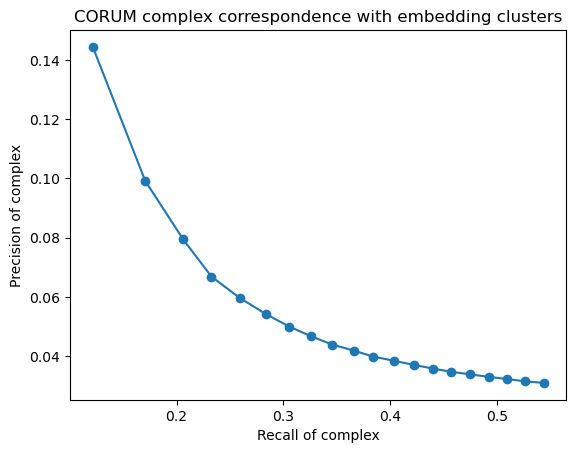

In [7]:
from eval import multivariate_metric
from constants import Column
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# automatically refresh changes to imported function using magic
%load_ext autoreload
%autoreload 2

# fname = f'{run_name}_{run_id}'
# fname = 'ctvae-conditional_wasserstein8_fxk3lmiz'
# fname= 'singlecell_ipca_fixederror_65pc' 
fname = 'vae_64_lg5jiwy7_v4'
corum = '/projects/site/gred/resbioai/comp_vision/cellpaint-ai/gene_sets/CORUM.txt'
# currated_corum = '/home/wangz222/cellpaint-ai-evaluation/src/cellpaint_ai_evaluation/perturbembed_pipeline/CORUM_Funk22.txt'
df = multivariate_metric(fname, reference=corum, mode='all', save=True, cellprofiler=False)

In [ ]:
# # plot histogram of norm of each row of df
# df = df_sc.groupby(Column.sgRNA.value).agg({col: 'mean' if col != Column.gene.value else 'first' for col in df_sc.columns[1:]}).groupby(Column.gene.value).mean()
# ntc_norm = (df_sc[df_sc[Column.gene.value]=='nontargeting'].groupby(Column.sgRNA.value).mean()- df.loc['nontargeting']).apply(lambda row: np.linalg.norm(row), axis=1).values
# df = df - df.loc['nontargeting']
# all_norm = df.apply(lambda row: np.linalg.norm(row), axis=1)

# gene_99 = list(all_norm[all_norm>np.percentile(ntc_norm, 99)].index)
# gene_95 = list(all_norm[all_norm>np.percentile(ntc_norm, 95)].index)

# gene_sig = {'99percentile': gene_99, '95percentile': gene_95}

# plt.hist(np.log10(all_norm+0.01), bins=100, density=True)
# plt.hist(np.log10(ntc_norm+0.01), bins=50, density=True)
# plt.title('Norm of each row of df')
# plt.xlabel('Norm')
# plt.ylabel('Density')
# plt.show()

# import pickle 
# with open('sig_gene_cp.pkl', 'wb') as f:
#     pickle.dump(gene_sig, f)

In [ ]:
# Create the cluster map with the custom color map
g = sns.clustermap(1 - dist_mat, cmap="RdBu_r", center=0, vmin=-1, vmax=1, xticklabels=gene_list, yticklabels=gene_list, figsize=(50, 50))
# You can further customize the appearance of the labels, such as changing the font size
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=0.01)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=0.01)
# Save the figure
# plt.savefig('clustermap_mcvae_cp.png', dpi=600)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
# Extract the linkage matrix for the rows
row_linkage_cp = g.dendrogram_row.linkage

In [ ]:
# Define the clusters using fcluster, e.g., by specifying a threshold distance t
# row_clusters = fcluster(row_linkage, t=16, criterion='maxclust')
row_clusters_cp = fcluster(row_linkage_cp, t=6, criterion='maxclust')

In [ ]:
# Create a dictionary to store the labels for each cluster
cluster_labels_dict_cp = {}
for i, cluster_num in enumerate(row_clusters_cp):
    label = gene_list[i]
    if cluster_num not in cluster_labels_dict_cp:
        cluster_labels_dict_cp[cluster_num] = []
    cluster_labels_dict_cp[cluster_num].append(label)

In [ ]:
len(gene_list)

In [ ]:
for ii in cluster_labels_dict_cp.keys():
    print(ii, len(cluster_labels_dict_cp[ii]))

In [ ]:
overlap = set(cluster_labels_dict[1]) & set(cluster_labels_dict_cp[1])
number_of_overlaps = len(overlap)

In [ ]:
number_of_overlaps

In [ ]:
len(cluster_labels_dict_cp[3])